In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics as skm
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

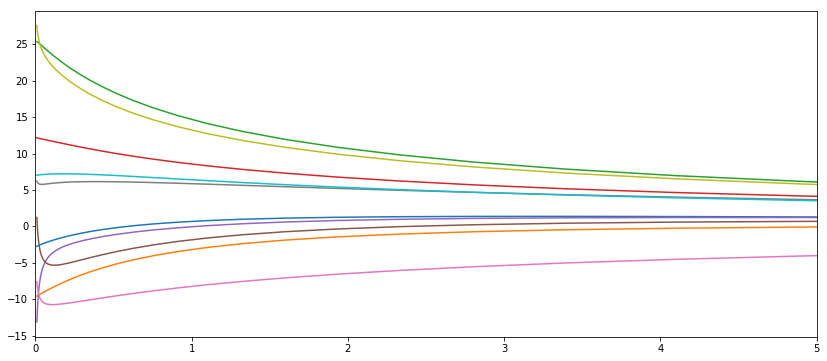

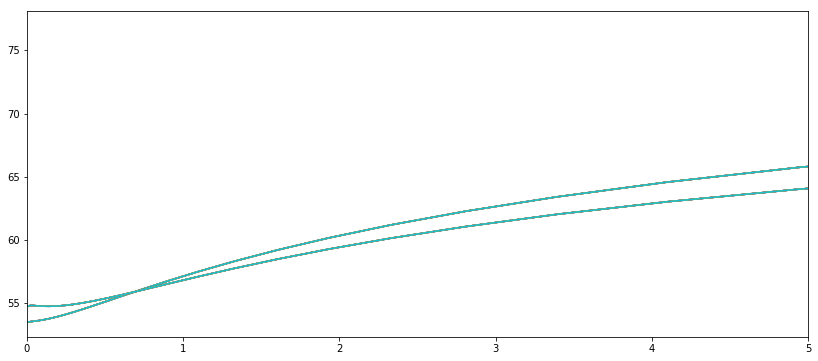

In [55]:
from sklearn import preprocessing
from sklearn.linear_model import Ridge

k = X_train.shape[1]
alphas = np.logspace(-2, 2)
params = np.zeros((len(alphas), k))
errort = np.zeros((len(alphas), k))
errorv = np.zeros((len(alphas), k))
for i,a in enumerate(alphas):
    s = preprocessing.StandardScaler()
    s.fit(X_train)
    scaledXtrain = s.transform(X_train)
    fit = Ridge(alpha=a, normalize=True).fit(scaledXtrain, y_train)
    params[i] = fit.coef_
    errort[i] = (skm.mean_squared_error(fit.predict(scaledXtrain),y_train)) ** 0.5
    errorv[i] = (skm.mean_squared_error(fit.predict(s.transform(X_test)),y_test)) ** 0.5
    
fig = plt.figure(figsize=(14,6))
plt.xlim(0,5)
for param in params.T:
    plt.plot(alphas, param)
fig = plt.figure(figsize=(14,6))
plt.xlim(0,5)
for err in errort.T:
    plt.plot(alphas, err)
for err in errorv.T:
    plt.plot(alphas, err)

plt.show()

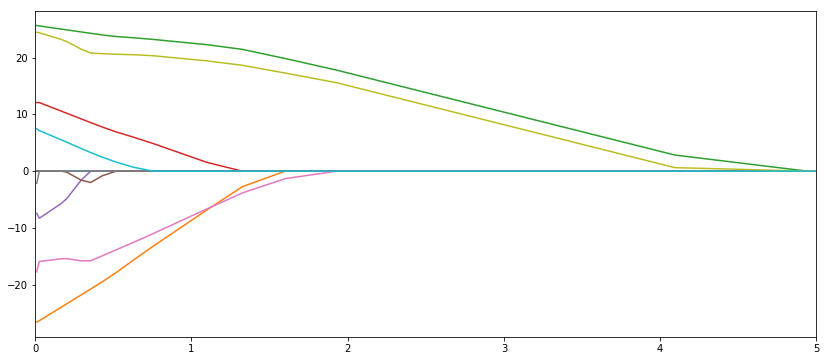

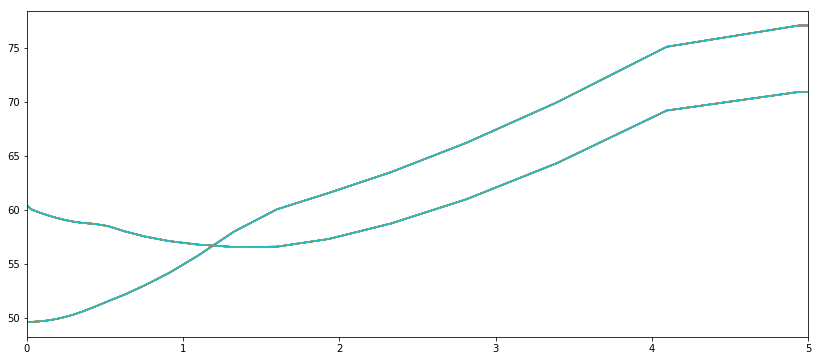

In [52]:
from sklearn.linear_model import Lasso

k = X_train.shape[1]
alphas = np.logspace(-2, 2)
params = np.zeros((len(alphas), k))
errort = np.zeros((len(alphas), k))
errorv = np.zeros((len(alphas), k))
for i,a in enumerate(alphas):
    s = preprocessing.StandardScaler()
    s.fit(X_train)
    scaledXtrain = s.transform(X_train)
    fit = Lasso(alpha=a, normalize=True).fit(scaledXtrain, y_train)
    params[i] = fit.coef_
    errort[i] = (skm.mean_squared_error(fit.predict(scaledXtrain),y_train)) ** 0.5
    errorv[i] = (skm.mean_squared_error(fit.predict(s.transform(X_test)),y_test)) ** 0.5
    
fig = plt.figure(figsize=(14,6))
plt.xlim(0,5)
for param in params.T:
    plt.plot(alphas, param)
fig = plt.figure(figsize=(14,6))
plt.xlim(0,5)
for err in errort.T:
    plt.plot(alphas, err)
for err in errorv.T:
    plt.plot(alphas, err)

plt.show()

In [57]:
from sklearn.linear_model import LinearRegression

X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

s = preprocessing.StandardScaler()
s.fit(X_train)
scaledXtrain = s.transform(X_train)

fitRidge = Ridge(alpha=1, normalize=True).fit(scaledXtrain, y_train)
fitLasso = Lasso(alpha=1, normalize=True).fit(scaledXtrain, y_train)
fitReg = LinearRegression().fit(scaledXtrain, y_train)

scaledXtest = s.transform(X_test)

mseRidge = skm.mean_squared_error(fitRidge.predict(scaledXtest),y_test)
mseLasso = skm.mean_squared_error(fitLasso.predict(scaledXtest),y_test)
mseReg = skm.mean_squared_error(fitReg.predict(scaledXtest),y_test)

mseRidgetrain = skm.mean_squared_error(fitRidge.predict(scaledXtrain),y_train)
mseLassotrain = skm.mean_squared_error(fitLasso.predict(scaledXtrain),y_train)
mseRegtrain = skm.mean_squared_error(fitReg.predict(scaledXtrain),y_train)

print(np.sqrt([mseRidge, mseLasso, mseReg, mseRidgetrain, mseLassotrain, mseRegtrain]))


[ 60.54814858  63.16485413  53.57215263  57.01522783  60.08058482
  54.17907165]


In [ ]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)